<a href="https://colab.research.google.com/github/Saumi18/Credit-Risk-Modeling/blob/main/Credit_Score_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Set Style & Context.
sns.set(style="dark")
sns.set(context = "notebook")

In [ ]:
data = pd.DataFrame(pd.read_csv('TrainingData.csv'))

In [ ]:
data.head() #Display of the first five rows of the training dataset.

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("No of rows & columns respectively:", data.shape)
print("Info:")
print(data.info())
data.isna().sum()

No of rows & columns respectively: (26549, 1216)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26549 entries, 0 to 26548
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 246.3 MB
None


,0
account_number,0
bad_flag,0
onus_attribute_1,6751
transaction_attribute_1,6751
transaction_attribute_2,6751
...,...
onus_attribute_44,23436
onus_attribute_45,23436
onus_attribute_46,23436
onus_attribute_47,23436


# **Performing EDA**



<ipython-input-6-fd058703790c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['bad_flag'], palette='coolwarm')


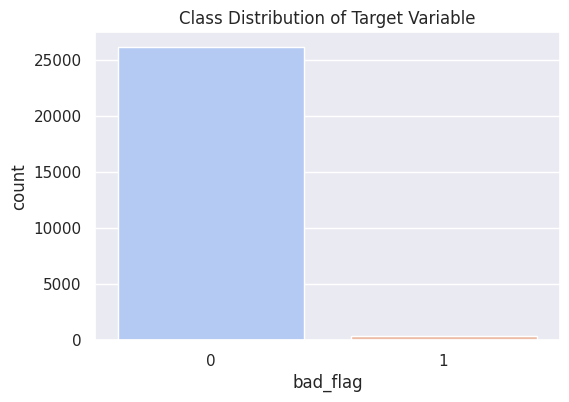

In [ ]:
# Distribution of Target Variable
if 'bad_flag' in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data['bad_flag'], palette='coolwarm')
    plt.title("Class Distribution of Target Variable")
    plt.show()

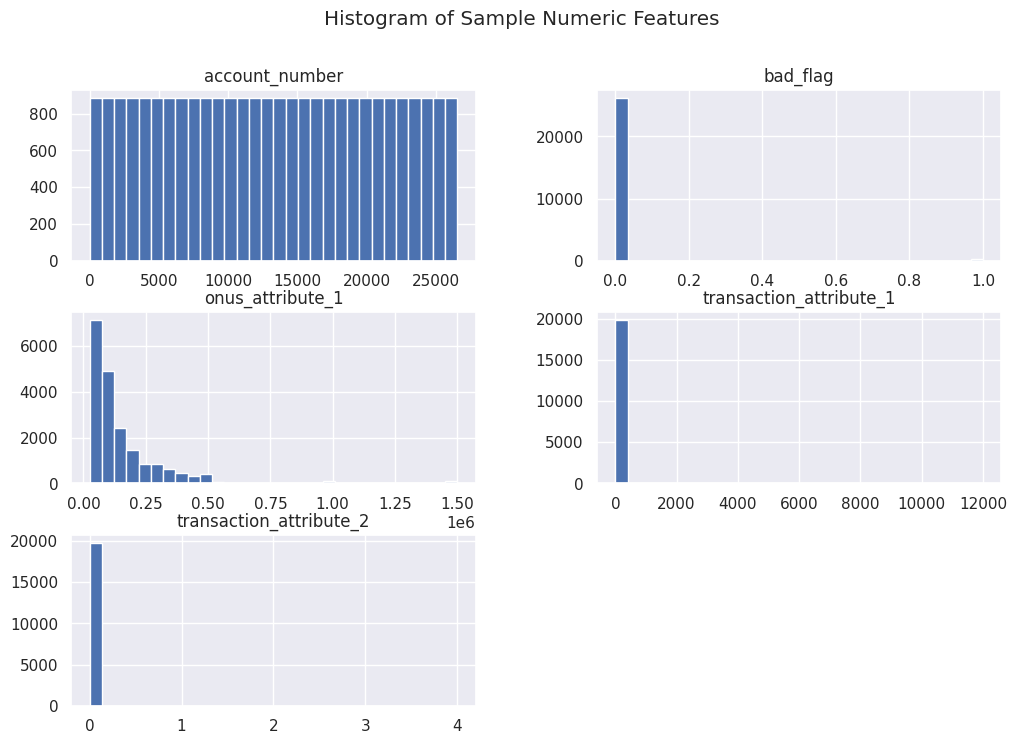

In [ ]:
# Histogram of Selected Features
sample_features = data.select_dtypes(include=['float64', 'int64']).columns[:5]
data[sample_features].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram of Sample Numeric Features")
plt.show()

In [ ]:
#Correlation Heatmap (Top 10 Features with Target, if exists)
if 'bad_flag' in data.columns:
    corr_matrix = data.astype('float32').corr()['bad_flag'].abs().sort_values(ascending=False)
    top_corr_features = corr_matrix.index[:10]
    plt.figure(figsize=(10, 6))
    sns.heatmap(data[top_corr_features].corr(), annot=False, cmap='coolwarm')
    plt.title("Top 10 Correlated Features Heatmap (Optimized)")
    plt.show()

# **Data Preprocessing**

In [ ]:
#Handling missing values > 80% in a column.
missing_percent = data.isna().mean()
data = data.loc[:, missing_percent < 0.8] #Columns with missing values > 80% will be removed.
data.shape

(26549, 1202)

**Applying PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Handle missing values (mean imputation)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)  #Fill missing values

#Standardizing the features
scaler = StandardScaler() #Mean = 0 & Variance = 1
data_scaled = scaler.fit_transform(data_imputed) #Fits the data into a model & transforms it such that it's more suitable for the model in a single step.

#Apply PCA
pca = PCA(n_components = 0.95)  #Keeps 95% variance
principal_components = pca.fit_transform(data_scaled)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(principal_components)

print(f"Reduced shape after PCA: {pca_df.shape}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.2f}")

Reduced shape after PCA: (26549, 376)
Explained variance ratio: 0.95


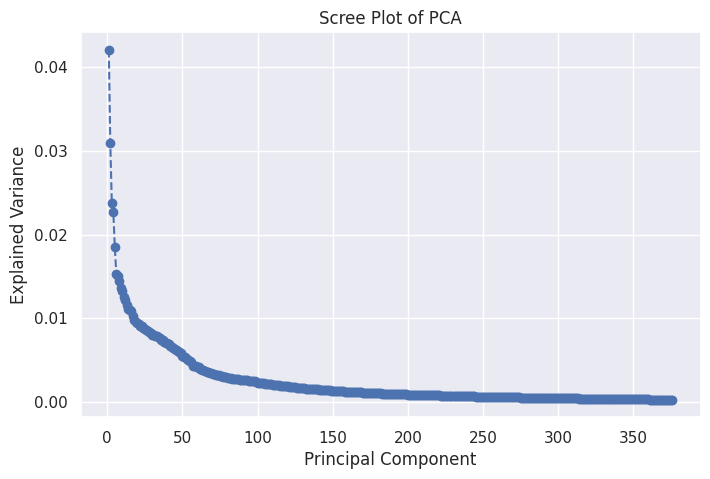

<ipython-input-11-f59685c7c5b0>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_df[0], y=pca_df[1], alpha=0.6, palette="coolwarm")


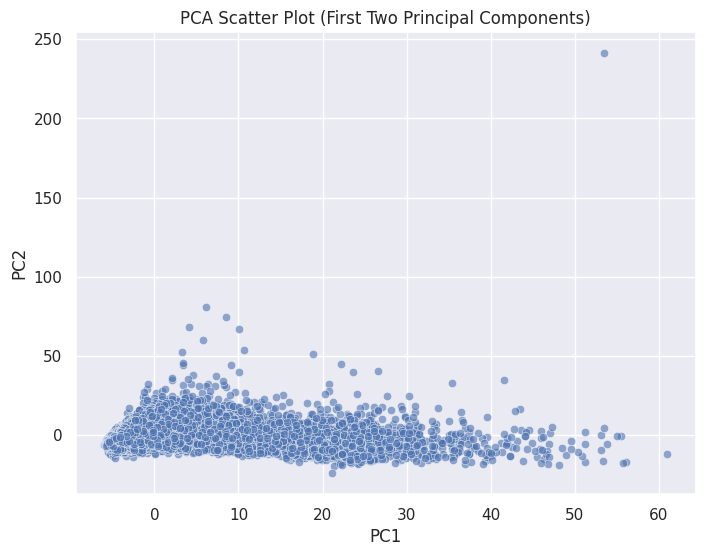

In [ ]:
#Scree Plot: Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Scree Plot of PCA")
plt.grid(True)
plt.show()

#PCA Scatter Plot (First Two Principal Components)
if pca_df.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_df[0], y=pca_df[1], alpha=0.6, palette="coolwarm")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Scatter Plot (First Two Principal Components)")
    plt.grid(True)
    plt.show()

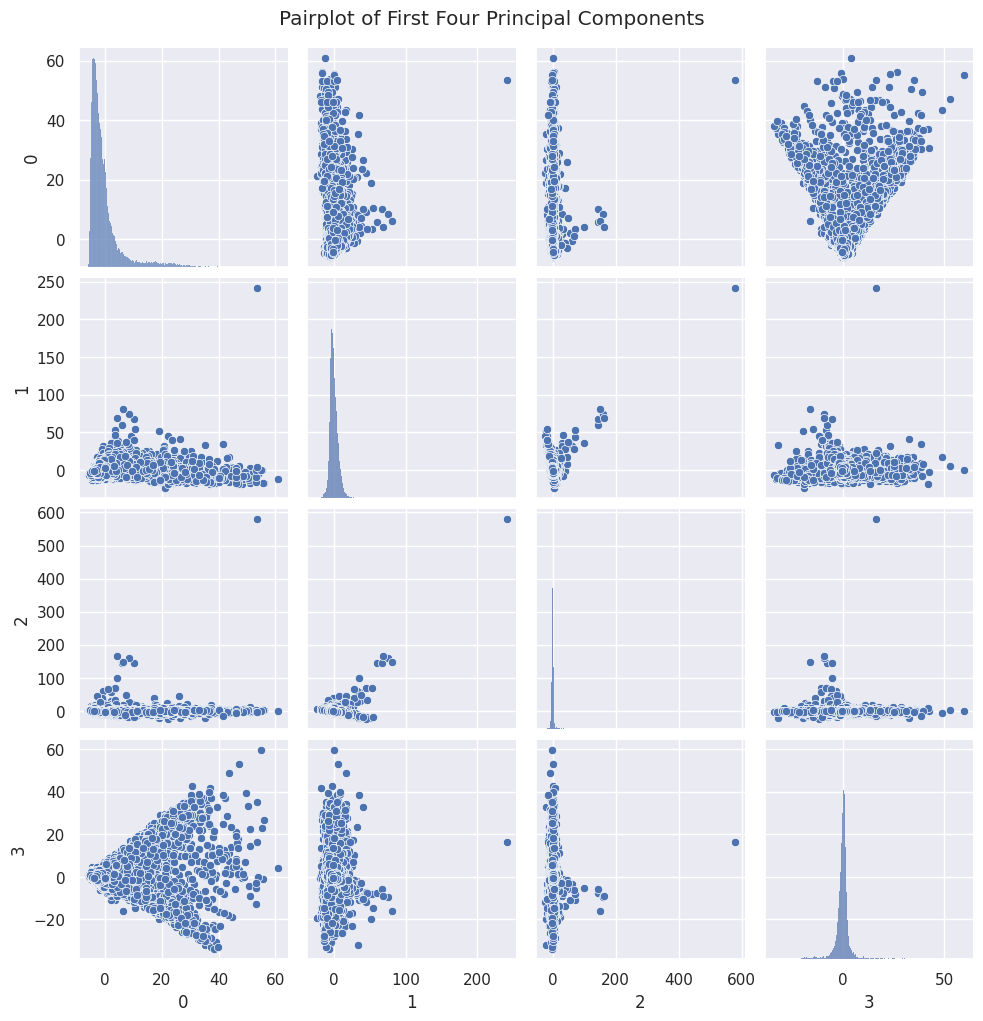

In [ ]:
# Pairplot of First Four Principal Components (if available)
if pca_df.shape[1] >= 4:
    sns.pairplot(pca_df.iloc[:, :4])
    plt.suptitle("Pairplot of First Four Principal Components", y=1.02)
    plt.show()